In [1]:
import pandas as pd
import os

### Merge the 12 months of sales into a single CSV file.

In [2]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")

files = [files for files in os.listdir('./Sales_Data')]

All_Months_Data = pd.DataFrame()

for file in files:
    df = pd.read_csv("./Sales_Data/"+file)
    All_Months_Data = pd.concat([All_Months_Data, df])
    
All_Months_Data.to_csv("All_Data.csv", index=False)


In [3]:
All_Data = pd.read_csv("All_Data.csv")
All_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Clean up the data

### Drop rows of NAN

In [4]:
nan_df = All_Data[All_Data.isna().any(axis=1)]
nan_df.head()

All_Data = All_Data.dropna(how='all')
All_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


### Find 'Or' and delete it

In [5]:
All_Data = All_Data[All_Data['Order Date'].str[0:2] != 'Or']

### Convert columns to the correct type

In [6]:
All_Data['Quantity Ordered'] = pd.to_numeric(All_Data['Quantity Ordered'])
All_Data['Price Each'] = pd.to_numeric(All_Data['Price Each'])

# Augment data with additional columns

### Task2 : Add Month Column

In [7]:
All_Data['Month'] = All_Data['Order Date'].str[0:2]
All_Data['Month'] = All_Data['Month'].astype('int32')
All_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


### Add a sales column

In [8]:
All_Data['Sales'] = All_Data['Quantity Ordered'] * All_Data['Price Each']
All_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


### Add a city column

In [28]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]
    
All_Data['City'] = All_Data['Purchase Address'].apply(lambda x:f"{get_city(x)} ({get_state(x)})") 

All_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


### Question1: What was the best month for sales? How much was earned that month?

In [11]:
results = All_Data.groupby('Month').sum()

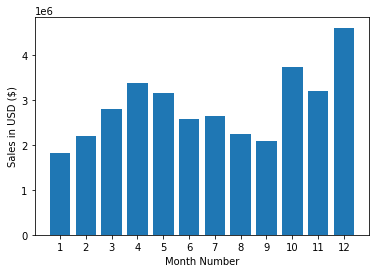

In [12]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month Number')
plt.show()

### What city had a highest number of sales?

In [30]:
highest_sales = All_Data.groupby('City').sum()
highest_sales

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


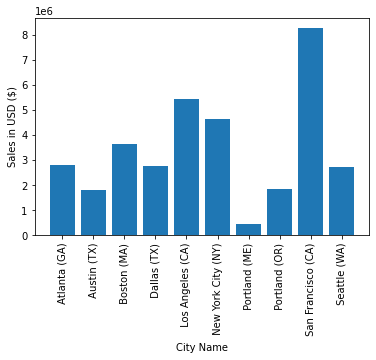

In [38]:
import matplotlib.pyplot as plt

Cities = [city for city, df in All_Data.groupby('City')]

plt.bar(Cities, highest_sales['Sales'])
plt.xticks(Cities, rotation='vertical', size=10)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City Name')
plt.show()

### What time should we display advertisements to maximize likelihood of customer's buying products?

In [41]:
All_Data['Order Date'] = pd.to_datetime(All_Data['Order Date'])

In [45]:
All_Data['Hour'] = All_Data['Order Date'].dt.hour
All_Data['Minute'] = All_Data['Order Date'].dt.minute

All_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


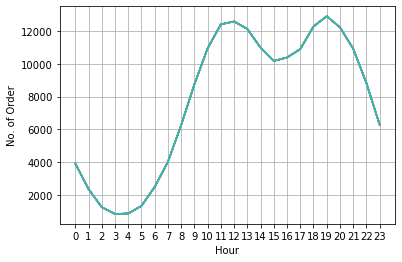

In [51]:
Hours = [hour for hour, df in All_Data.groupby('Hour')]

plt.plot(Hours, All_Data.groupby(['Hour']).count())
plt.xticks(Hours)
plt.xlabel('Hour')
plt.ylabel('No. of Order')
plt.grid()
plt.show()

# Around 11am and 7pm.

### What products are most often sold together?

In [59]:
df = All_Data[All_Data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID', 'Grouped']].drop_duplicates()

df.head()

<ipython-input-59-01b94dd08ae0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [61]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


### Questsion5: What product sold the most? Why do you think it sold the most?

In [62]:
All_Data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA),22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),9,27


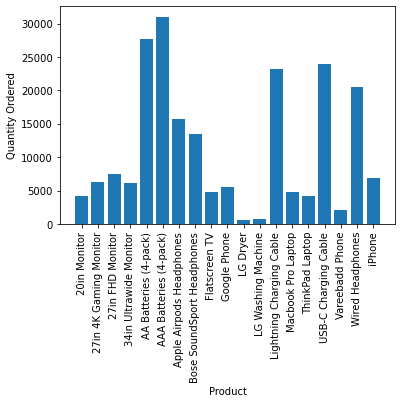

In [72]:
product_group = All_Data.groupby('Product')

Quantity_ordered = product_group.sum()['Quantity Ordered']

Products = [product for product, df in product_group]

plt.bar(Products, Quantity_ordered)
plt.xlabel('Product')
plt.ylabel('Quantity Ordered')
plt.xticks(Products, rotation='vertical', size=10)
plt.show()



<ipython-input-78-e6b8c379d2be>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(Products, rotation='vertical', size=10)


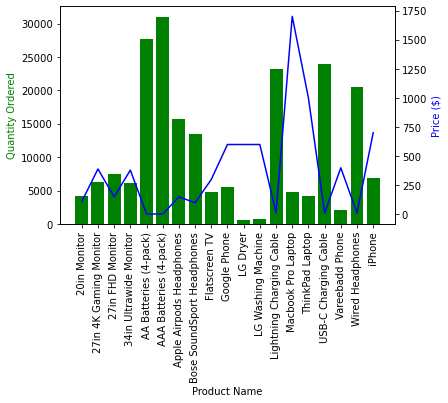

In [78]:
prices = All_Data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(Products, Quantity_ordered, color ='g')
ax2.plot(Products, prices, 'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(Products, rotation='vertical', size=10)

plt.show()